# Homework 2: Exploratory data analysis and visualization

UIC CS 418, Spring 2022

_According to the **Academic Integrity Policy** of this course, all work submitted for grading must be done individually, unless otherwise specified. While we encourage you to talk to your peers and learn from them, this interaction must be superficial with regards to all work submitted for grading. This means you cannot work in teams, you cannot work side-by-side, you cannot submit someone else’s work (partial or complete) as your own. In particular, note that you are guilty of academic dishonesty if you extend or receive any kind of unauthorized assistance. Absolutely no transfer of program code between students is permitted (paper or electronic), and you may not solicit code from family, friends, or online forums. Other examples of academic dishonesty include emailing your program to another student, copying-pasting code from the internet, working in a group on a homework assignment, and allowing a tutor, TA, or another individual to write an answer for you. Academic dishonesty is unacceptable, and penalties range from failure to expulsion from the university; cases are handled via the official student conduct process described at https://dos.uic.edu/conductforstudents.shtml._

This homework is an **individual assignment for all graduate students**. **Undergraduate students are allowed to work in pairs and submit one homework assignment per pair**. There will be no extra credit given to undergraduate students who choose to work alone. The pairs of students who choose to work together and submit one homework assignment together still need to abide by the Academic Integrity Policy and not share or receive help from others (except each other).

There are three parts in this homework. The first one is a practice introduction to `matplotlib` (5%). The second is a guided exploration of a bikeshare dataset (45%). The third one is a self-guided exploration of a dataset on social media and internet attitudes (50%). You can also earn extra credit of 20%.


## Due Date

This assignment is due at 11:59pm Friday, February 18th. 


### What to Submit

You need to complete all code and answer all questions denoted by **Q#** (each one is under a bike image) in this notebook. When you are done, you should export **hw2.ipynb** with your answers as a PDF file, upload the PDF file to *Homework 2 - Written Part* on Gradescope, tagging each question. You need to upload a completed Jupyter notebook (hw2.ipynb file) to *Homework 2 - code* on Gradescope. If one of these two parts (written and code) is missing, you will lose 50%. For undergraduate students who work in a team of two, only one student needs to submit the homework and just tag the other student on Gradescope.

#### Autograding

We will not use autograding for this homework assignment.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Practice: `matplotlib` (5%)

[`matplotlib`][mpl] is the most widely used plotting library available for Python. It comes with a good amount of out-of-the-box functionality and is highly customizable. Most other plotting libraries in Python provide simpler ways to generate complicated `matplotlib` plots, including `seaborn`, so it's worth learning a bit about `matplotlib` now.

Notice how all of our notebooks have lines that look like:

	%matplotlib inline
	import matplotlib.pyplot as plt
	
The `%matplotlib inline` magic command tells `matplotlib` to render the plots
directly onto the notebook (by default it will open a new window with the plot).

Then, the `import` line lets us call `matplotlib` functions using `plt.<func>`

Here's a graph of `cos(x)` from 0 to 2 * pi.

[mpl]: http://matplotlib.org/

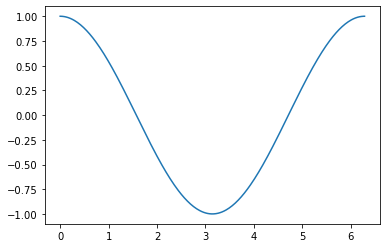

In [2]:
# Set up (x, y) pairs from 0 to 2*pi
xs = np.linspace(0, 2 * np.pi, 300)
ys = np.cos(xs)

# plt.plot takes in x-values and y-values and plots them as a line
plt.plot(xs, ys)

`matplotlib` also conveniently has the ability to plot multiple things on the same plot. Just call `plt.plot` multiple times in the same cell:

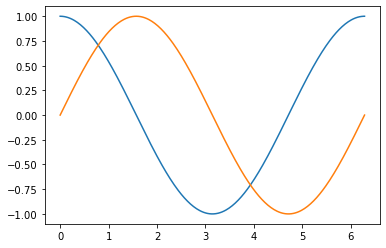

In [3]:
plt.plot(xs, ys)
plt.plot(xs, np.sin(xs))

That plot looks pretty nice but isn't presentation-ready. Luckily, `matplotlib` has a wide array of plot customizations.

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q0 (5%):

Skim through the first part of the tutorial at https://github.com/rougier/matplotlib-tutorial to create the plot below. There is a lot of extra information there which we suggest
you read on your own time. For now, just look for what you need to make the plot.

Specifically, you'll have to change the x and y limits, add a title, and add a legend.

![](q1.png)

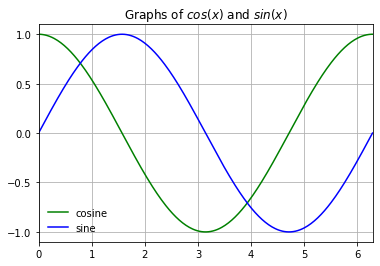

In [4]:
# Here's the starting code from last time. Edit / Add code to create the plot above.
plt.plot(xs, ys, color="green", label="cosine")
plt.plot(xs, np.sin(xs), color="blue", label="sine")
plt.xlim(0,6.3)
plt.yticks(np.arange(-1, 1.1, 0.5))
plt.title("Graphs of $\it{cos(x)}$ and $\it{sin(x)}$")
plt.legend(frameon=False)
plt.grid()

# Part 1: Guided EDA of bikeshare trips (40%)

You will be performing some basic EDA (exploratory data analysis) on
bikeshare data in Washington D.C. 

The variables in this data frame are defined as:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : whether day is holiday or not
- weekday : day of the week (Sunday to Saturday)
- workingday : if day is neither weekend nor holiday
- weathersit :
    - 1: Clear or partly cloudy
    - 2: Mist + clouds
    - 3: Light Snow or Rain
    - 4: Heavy Rain or Snow
- temp : Normalized temperature in Celsius (divided by 41)
- atemp: Normalized feeling temperature in Celsius (divided by 50)
- hum: Normalized percent humidity (divided by 100)
- windspeed: Normalized wind speed (divided by 67)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including casual and registered

In [5]:
bike_trips = pd.read_csv('bikeshare.csv')

# Here we'll do some pandas datetime parsing so that the dteday column
# contains datetime objects.
bike_trips['dteday'] += ':' + bike_trips['hr'].astype(str)
bike_trips['dteday'] = pd.to_datetime(bike_trips['dteday'], format="%Y-%m-%d:%H")
bike_trips = bike_trips.drop(['yr', 'mnth', 'hr'], axis=1)

bike_trips.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01 00:00:00,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01 01:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01 02:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01 03:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01 04:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.1 (8%):
Explore the `bike_trips` dataframe to answer the following questions.

What is the data granularity?
What time range is represented here? Write code in the cell below to perform your exploration.

In [6]:
bike_trips.shape
bike_trips.iloc[0].to_frame()
bike_trips['dteday'].value_counts()

2011-01-01 00:00:00    1
2012-05-03 04:00:00    1
2012-05-02 14:00:00    1
2012-05-02 15:00:00    1
2012-05-02 16:00:00    1
                      ..
2011-09-04 01:00:00    1
2011-09-04 02:00:00    1
2011-09-04 03:00:00    1
2011-09-04 04:00:00    1
2012-12-31 23:00:00    1
Name: dteday, Length: 17379, dtype: int64

The granularity of bike_trips data is that the dataframe represents the number of registered users and bike count on a certain day and hour of the year (from 2011 to 2012). This can be concluded from the dteday row which has unique values for each dteday value.

## Using `pandas` to plot

`pandas` provides useful methods on dataframes. For simple plots, we prefer to
just use those methods instead of the `matplotlib` methods since we're often
working with dataframes anyway. The syntax is:

    dataframe.plot.<plotfunc>

Where the `<plotfunc>` is one of the functions listed under _Plotting_ here: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

<AxesSubplot:xlabel='dteday'>

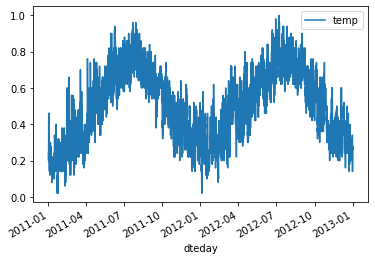

In [7]:
# This plot shows the temperature at each data point

bike_trips.plot.line(x='dteday', y='temp')

## `seaborn`

Now, we'll learn how to use the [`seaborn`][sns] Python library. `seaborn`
is built on top of `matplotlib` and provides many helpful functions
for statistical plotting that `matplotlib` and `pandas` don't have.

Generally speaking, we'll use `seaborn` for more complex statistical plots,
`pandas` for simple plots (eg. line / scatter plots), and
`matplotlib` for plot customization.

Nearly all `seaborn` functions are designed to operate on `pandas`
dataframes. Most of these functions assume that the dataframe is in
a specific format called *long-form*, where each column of the dataframe
is a particular feature and each row of the dataframe a single datapoint.

For example, this dataframe is long-form:

```
   country year avgtemp
 1  Sweden 1994       6
 2 Denmark 1994       6
 3  Norway 1994       3
 4  Sweden 1995       5
 5 Denmark 1995       8
 6  Norway 1995      11
 7  Sweden 1996       7
 8 Denmark 1996       8
 9  Norway 1996       7
```

But this dataframe of the same data is not:

```
   country avgtemp.1994 avgtemp.1995 avgtemp.1996
 1  Sweden            6            5            7
 2 Denmark            6            8            8
 3  Norway            3           11            7
```

Note that the `bike_trips` dataframe is long-form.

For more about long-form data, see https://stanford.edu/~ejdemyr/r-tutorials/wide-and-long.
For now, just remember that we typically prefer long-form data and it makes plotting using
`seaborn` easy as well.

[sns]: http://seaborn.pydata.org/index.html

We can create the same plot as the `dataframe.plot` above using the following `seaborn` function: `sns.lineplot`. Notice that instead of calling the plot function on dataframe object, here we pass it as a parameter to the function:

<AxesSubplot:xlabel='dteday', ylabel='temp'>

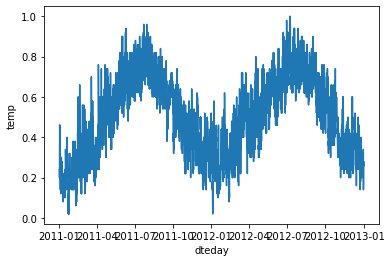

In [8]:
# You can create a plot similar to the one above using the following seaborn syntax
# Note that the seaborn plot is a bit different and requires some customizations (more on this later)
sns.lineplot(x="dteday", y="temp", data=bike_trips)

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.2 (8%):

Use seaborn's `barplot` function to make a bar chart showing the average
number of registered riders on each day of the week over the 
entire `bike_trips` dataset.

Here's a link to the seaborn API: http://seaborn.pydata.org/api.html

See if you can figure it out by reading the docs. 

What trends do you notice? What do you suppose causes these trends?

Notice that `barplot` draws error bars for each category. It uses bootstrapping to make those.

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

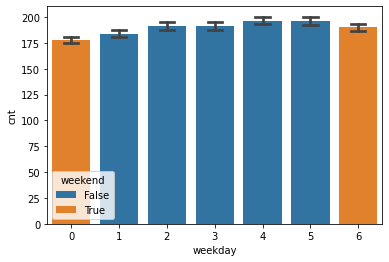

In [9]:
bike_trips["weekend"] = bike_trips["weekday"].isin([0, 6])
sns.barplot(x="weekday", y="cnt", hue="weekend", capsize=.3, data=bike_trips, ci=68, dodge=False)

The bar chart shows that the ride counts on weekdays are higher than on weekends. This could be caused by the fact that a lot of rented bikes are used as a transport to go to work or school. The most busy weekdays are Thursday and Friday. The error bars are the same for each category. 

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.3 (8%):

Now for a fancier plot that `seaborn` makes really easy to produce.

Use the `displot` function to plot a histogram of all the total rider counts in the `bike_trips` dataset. Can you fit a curve to the histogram of the data using `seaborn`? You just need to tune `kde` and `stat` paramaters to the `displot` function. Fancy!

Text(0.5, 1.0, 'Total riders count')

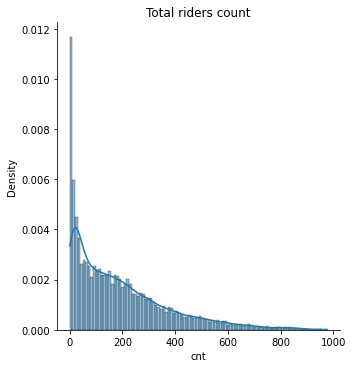

In [10]:
# sns.displot(data=bike_trips, x="cnt", kde=True)

sns.displot(data=bike_trips, x="cnt", kde=True, stat="density", bins=100, common_norm=False,)
plt.title('Total riders count', fontsize=12)


<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.4 (8%):

Use `seaborn` to make side-by-side boxplots of the number of casual riders (just
checked out a bike for that day) and registered riders (have a bikeshare membership). The `boxplot` function will plot all the columns of the dataframe you pass in.

Once you make the plot, you'll notice that there are many outliers that make the plot hard to see. To mitigate this, change the y-scale to be logarithmic.

That's a plot customization so you'll use `matplotlib`. The `boxplot` function returns a `matplotlib` Axes object which represents a single plot and has a `set_yscale` function.

The result (after customization) should look like:

![](q5.png)

Revisiting Q1.1 on data granularity, what is more suitable text for `ylabel` than `Number of riders`?

In [11]:
copy = pd.DataFrame(data={'cnt': [], 'type': []})
i = 0
for val in bike_trips["casual"]:
    copy = pd.concat([copy, pd.DataFrame([[val, 'casual']], columns=['cnt', 'type'], index=[i])])
    i += 1
    
for val in bike_trips["registered"]:
    copy = pd.concat([copy, pd.DataFrame([[val, 'registered']], columns=['cnt', 'type'], index=[i])])
    i += 1
copy

,cnt,type
0,3.0,casual
1,8.0,casual
2,5.0,casual
3,3.0,casual
4,0.0,casual
...,...,...
34753,108.0,registered
34754,81.0,registered
34755,83.0,registered
34756,48.0,registered


[Text(0.5, 0, ''), Text(0, 0.5, 'Number of riders')]

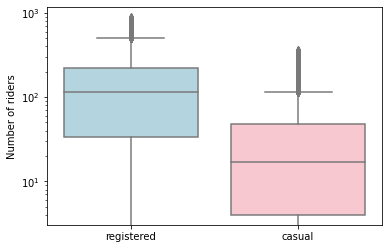

In [12]:
ax = sns.boxplot(x=copy["type"], y=copy["cnt"], order=["registered", "casual"], palette=['lightblue', 'pink'])
ax.set_yscale("log")
ax.set(xlabel='', ylabel='Number of riders')

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.5 (8%):

Let's take a closer look at the number of registered vs. casual riders.

Use the `lmplot` function to make a scatterplot. Put the number of casual
riders on the x-axis and the number of registered riders on the y-axis.
Each point should correspond to a single row in your `bike_trips` dataframe. Notice that `seaborn` automatically fits a line of best
fit to the plot. Does that line seem to be relevant?

You should note that `lmplot` allows you to pass in `fit_line=False` to
avoid plotting lines of best fit when you feel they are unnecessary 
or misleading.

There seem to be two main groups in the scatterplot. Let's
see if we can separate them out. Use `lmplot` to make the scatterplot again. This time, use the `hue` parameter
to color points for weekday trips differently from weekend trips. You should
get something that looks like:

![](q1-5.png)


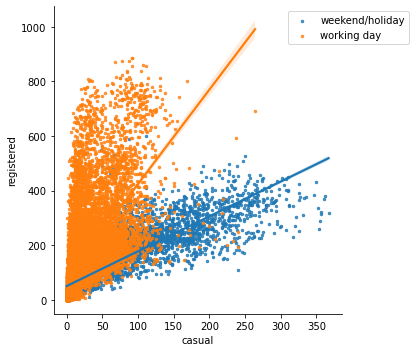

In [13]:
ax = sns.lmplot(x="casual", y="registered", data=bike_trips, hue='workingday', scatter_kws={'s': 6}, legend = True)
legendObj = ax.legend
handlesObj = legendObj.legendHandles
texts = legendObj.texts

plt.legend(labels=["weekend/holiday","working day"], bbox_to_anchor=(0.75, 0.5, 0.5, 0.5),handles=handlesObj)
legendObj.remove()


## Want to learn more?

We recommend checking out the `seaborn` tutorials on your own time. http://seaborn.pydata.org/tutorial.html

The `matplotlib` tutorial we linked in Question 1 is also a great refresher on common `matplotlib` functions: https://www.labri.fr/perso/nrougier/teaching/matplotlib/

Here's a great blog post about the differences between Python's visualization libraries:
https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/


# Part 2: Self-directed EDA of social media and internet attitudes (55%)

The last part is intentionally more open-ended and will be graded on the completeness of the plot(s) produced and the insights you gain from them.  The goal here is for you to thoroughly explore a dataset on attitudes towards the internet and whether it's good for society. 

_Question 2.0_ is asking you to look at a given visualization and reverse engineer the code that created it. _Question 2.1_ is about _data exploration visualization_ while the other questions are about _data presentation visualization_. Report your three most significant findings (_Q2.2, Q2.3, and Q2.4_). Each finding should have a _visualization headline_  which highlights the main takeaway in 5-15 words, an informative visualization that supports your finding and a _visualization description_, 100-150 words per finding explaining your assumptions and what you have found. For example, the visualization headline could be "_Majority of Facebook, Instagram and Snapchat users visit these social networks daily_" with the following bar plot visualization:  

<img src="q2-1.png">


The survey data that you will analyze was collected by Pew Research. In order to access it, you need to create an account and download it from [here](https://www.pewresearch.org/internet/dataset/core-trends-survey/) (click on "Download Dataset" in upper right corner). The file you will work with is `January 8-February 7, 2019 - Core Trends Survey - CSV.csv`. The file that contains information about the meaning of each feature is `January 8-February 7, 2019 - Core Trends Survey - Questionnaire.docx`.


Be sure to consider transformations, subsets, correlations, reference markers, and lines/curves-of-best-fit (as covered in Chapter 6 of PTDS) to reveal the relationship that you are wanting to learn more about.  Also be sure to make plots that are appropriate for the variable types.  For completeness, be explicit about any assumptions you make in your analysis.  An exemplary plot will have:

* A title
* Labelled and appropriately scaled axes
* A legend, if applicable
* A carefully selected color scheme
* A main point, accentuated through design choices


<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.0 (5%): Reverse Engineer

Your first step is to load the data from `January 8-February 7, 2019 - Core Trends Survey - CSV.csv`, and understand what is stored in it. Read the  the survey questionnaire in `January 8-February 7, 2019 - Core Trends Survey - Questionnaire.docx` to understand the meaning of each feature. Your assignment is to replicate the bar plot visualization shown above. Notice the labels on x and y axes as well as the legend of the plot to determine the information needed to construct the plot.

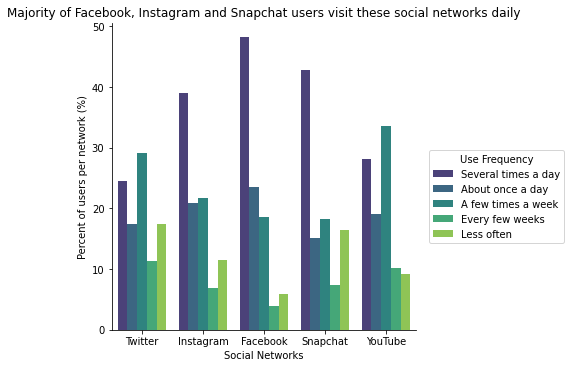

In [14]:
# 1) Read your dataframe with pandas
core_trends = pd.read_csv('CoreTrendsSurvey.csv')

# 2) Identify what colums are used for plot above
core_trends_use = pd.DataFrame(core_trends[['sns2a', 'sns2b', 'sns2c', 'sns2d', 'sns2e']])

# 3) Filter required rows and columns necessary for plotting above figure
core_trends_use.rename(columns={"sns2a": "Twitter",
                                "sns2b": "Instagram",
                                "sns2c": "Facebook",
                                "sns2d": "Snapchat",
                                "sns2e": "YouTube"}, inplace = True)


# 4) Your dataframe is in wide_format. You need to convert to long_format. See pandas.melt documentation
# i.e. originally there is a column each for these five social medias. The column name should be value for a new column.
core_trends_use = core_trends_use.melt()

# 5) Once dataframe is in wide format, filter individuals who responded to the survey
for column in core_trends_use:
    core_trends_use[column] = core_trends_use[column].replace(r'\s+', np.nan, regex=True)
    core_trends_use[column] = core_trends_use[column].replace('9', np.nan, regex=True)
    core_trends_use[column] = core_trends_use[column].replace('8', np.nan, regex=True)
core_trends_use[["value"]] = core_trends_use[["value"]].apply(pd.to_numeric)

# 6) Use pandas aggregation after groupby to calculate percentage of responses for each social media
tw = core_trends_use[core_trends_use.variable == 'Twitter']
inst = core_trends_use[core_trends_use.variable == 'Instagram']
face = core_trends_use[core_trends_use.variable == 'Facebook']
snap = core_trends_use[core_trends_use.variable == 'Snapchat']
yt = core_trends_use[core_trends_use.variable == 'YouTube']

tw = tw.groupby('value', dropna=True).describe()
tw['percent'] = (tw[('variable','freq')]  / tw[('variable','freq')].sum()) * 100

inst = inst.groupby('value', dropna=True).describe()
inst['percent'] = (inst[('variable','freq')]  / inst[('variable','freq')].sum()) * 100

face = face.groupby('value', dropna=True).describe()
face['percent'] = (face[('variable','freq')]  / face[('variable','freq')].sum()) * 100

snap = snap.groupby('value', dropna=True).describe()
snap['percent'] = (snap[('variable','freq')]  / snap[('variable','freq')].sum()) * 100

yt = yt.groupby('value', dropna=True).describe()
yt['percent'] = (yt[('variable','freq')]  / yt[('variable','freq')].sum()) * 100

concatenated = pd.concat([tw.assign(dataset='Twitter'), 
                          inst.assign(dataset='Instagram'),
                          face.assign(dataset='Facebook'),
                          snap.assign(dataset='Snapchat'),
                          yt.assign(dataset='YouTube')
                         ])

concatenated = concatenated.reset_index()
final = pd.DataFrame(concatenated[['value', 'dataset', 'percent']])

# 7) Use seaborn barplot to plot the figure above. Customize with color palette='viridis'
ax = sns.catplot(x = 'dataset', y = "percent", hue="value", data = final, kind = "bar", palette='viridis')

# 8) Add descriptive xlabel, ylabel, and title
plt.title("Majority of Facebook, Instagram and Snapchat users visit these social networks daily")
ax.set(xlabel='Social Networks', ylabel='Percent of users per network (%)')

# 9) Customize legend if necessary
legendObj = ax.legend
handlesObj = legendObj.legendHandles 
texts = legendObj.texts

plt.legend(labels = ['Several times a day', 'About once a day', 'A few times a week', 'Every few weeks', 'Less often'],
    title = "Use Frequency",
    bbox_to_anchor=(1, 0.1, 0.5, 0.5),
    handles = handlesObj)

legendObj.remove()


<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.1 (5%): Initial exploration

Run descriptive statistics on the data by considering the EDA key data properties we covered in class. Write a 100-150 word description of your findings. Based on these statistics or other ideas you have, form hypotheses that guide your EDA and visualizations for the last three questions. You need to show at least one visualization but you are welcome to show more.

In [15]:
# Run descriptive statistics on the data and develop ideas on what to explore
core_trends = pd.read_csv('CoreTrendsSurvey.csv')
core_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 74 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   respid        1502 non-null   int64  
 1   sample        1502 non-null   int64  
 2   comp          1502 non-null   int64  
 3   int_date      1502 non-null   int64  
 4   lang          1502 non-null   int64  
 5   cregion       1502 non-null   int64  
 6   state         1502 non-null   int64  
 7   density       1502 non-null   int64  
 8   sfips         1502 non-null   int64  
 9   usr           1502 non-null   object 
 10  qs1           1502 non-null   object 
 11  sex           1502 non-null   int64  
 12  eminuse       1502 non-null   int64  
 13  intmob        1502 non-null   int64  
 14  intfreq       1502 non-null   object 
 15  snsint2       1502 non-null   int64  
 16  home4nw       1502 non-null   int64  
 17  bbhome1       1502 non-null   object 
 18  bbhome2       1502 non-null 

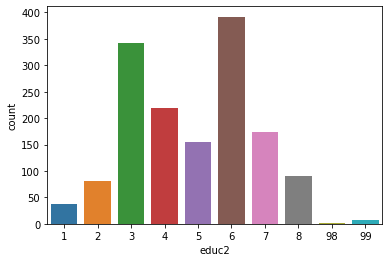

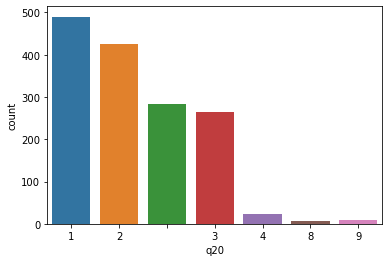

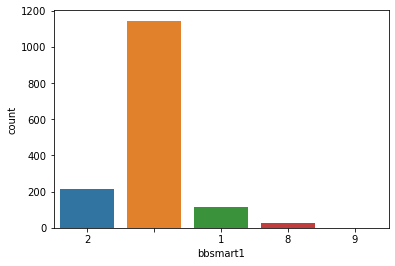

In [16]:
# Create one or more visualizations
core_trends1 = core_trends.dropna(how='any')
sns.countplot(data=core_trends1, x='educ2')
plt.show()

core_trends2 = core_trends.dropna(how='any')
sns.countplot(data=core_trends2, x='q20')
plt.show()

core_trends3 = core_trends.dropna(how='any')
sns.countplot(data=core_trends3, x='bbsmart1')
plt.show()

From the information above, it has been discovered that the data in the dataframe is mostly saved in either int or object formats. The int objects from educ2 describes the level of education that the participants have. This might be a good data for analyzing if level of education affects the time people use social media, or which social media is mostly used by people of certain education level. 
In addition to that, q20 shows on which device people usually go online. This column can be used in order to analyze the friquency of people going online with which device. The q20 column is related to BBSMART columns which in combination may show the correlation in which device users have broadband internet subscription.

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.2 (15%): How education level is correlated to which social media people use

The graph below depicts the correlation of how education level affects which social media people prefer. There are 5 major social media: Twitter, Instagram, Facebook, Snapchat, and YouTube that were asked in the questionnaire. The more person uses a certain social media, the higher friquency it shows on the bar chart.
The x axis shows social medias, and each column represent the education level of a person that uses it.

In [17]:
import warnings

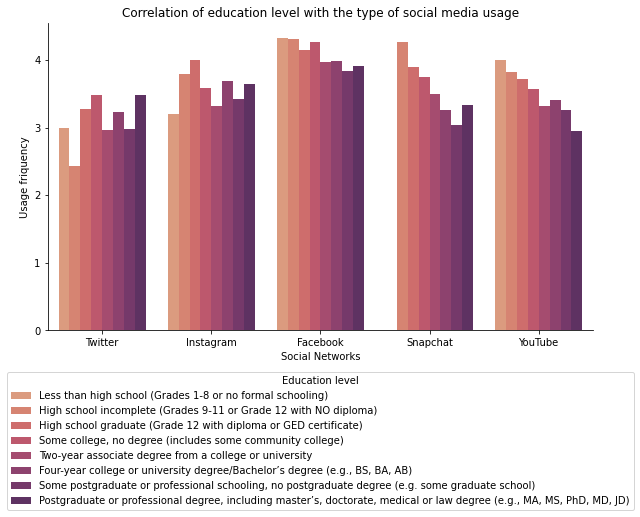

In [18]:
warnings.filterwarnings('ignore')
edu = pd.DataFrame(core_trends[['educ2']])

core_trends_use = pd.DataFrame(core_trends[['sns2a', 'sns2b', 'sns2c', 'sns2d', 'sns2e']])
core_trends_use.rename(columns={"sns2a": "Twitter",
                                "sns2b": "Instagram",
                                "sns2c": "Facebook",
                                "sns2d": "Snapchat",
                                "sns2e": "YouTube"}, inplace = True)

core_trends_use = core_trends_use.melt()
core_trends_use_new = core_trends_use.copy()
core_trends_use_new['educ'] = np.nan

for i in range(len(edu['educ2'])):
    val = edu['educ2'][i]
    core_trends_use_new['educ'][i + 0 * len(edu['educ2'])] = val
    core_trends_use_new['educ'][i + 1 * len(edu['educ2'])] = val
    core_trends_use_new['educ'][i + 2 * len(edu['educ2'])] = val
    core_trends_use_new['educ'][i + 3 * len(edu['educ2'])] = val
    core_trends_use_new['educ'][i + 4 * len(edu['educ2'])] = val

for column in core_trends_use_new:
    core_trends_use_new[column] = core_trends_use_new[column].replace(r'\s+', np.nan, regex=True)
    core_trends_use_new[column] = core_trends_use_new[column].replace(98.0, np.nan, regex=True)
    core_trends_use_new[column] = core_trends_use_new[column].replace(99.0, np.nan, regex=True)
    
core_trends_use_new[["educ"]] = core_trends_use_new[["educ"]].apply(pd.to_numeric)
core_trends_use_new[["value"]] = core_trends_use_new[["value"]].apply(pd.to_numeric)

for i in range(len(core_trends_use_new['value'])):
    if (core_trends_use_new['value'][i] == 1):
        core_trends_use_new['value'][i] = 5
    elif (core_trends_use_new['value'][i] == 2): 
        core_trends_use_new['value'][i] = 4
    elif (core_trends_use_new['value'][i] == 4):
        core_trends_use_new['value'][i] = 2
    elif (core_trends_use_new['value'][i] == 5):
        core_trends_use_new['value'][i] = 1

ax = sns.catplot(x = 'variable', y = "value", hue="educ", data = core_trends_use_new, kind = "bar", palette='flare', ci = None)
plt.gcf().set_size_inches(10, 5)

plt.title("Correlation of education level with the type of social media usage")
ax.set(xlabel='Social Networks', ylabel='Usage friquency')

legendObj = ax.legend
handlesObj = legendObj.legendHandles 
texts = legendObj.texts

plt.legend(labels = ['Less than high school (Grades 1-8 or no formal schooling)', 
                     'High school incomplete (Grades 9-11 or Grade 12 with NO diploma)', 
                     'High school graduate (Grade 12 with diploma or GED certificate)', 
                     'Some college, no degree (includes some community college)', 
                     'Two-year associate degree from a college or university',
                     'Four-year college or university degree/Bachelor’s degree (e.g., BS, BA, AB)',
                     'Some postgraduate or professional schooling, no postgraduate degree (e.g. some graduate school)',
                     'Postgraduate or professional degree, including master’s, doctorate, medical or law degree (e.g., MA, MS, PhD, MD, JD)'],
    title = "Education level",
    loc = "lower center",
    bbox_to_anchor=(0.25, -0.6, 0.5, 0.5),
    handles = handlesObj)

legendObj.remove()


<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.3 (15%): Smartphone owners’ preferred way of accessing the internet varies substantially by education level 

The graph shows how the education level affects the type of device people usually use. The graph shows that the majority of people with a Bachelor's degree mostly use both cell phone and desktop/tablet. 

Education levels:<br>
1	Less than high school (Grades 1-8 or no formal schooling)<br>
2	High school incomplete (Grades 9-11 or Grade 12 with NO diploma)<br>
3	High school graduate (Grade 12 with diploma or GED certificate)<br>
4	Some college, no degree (includes some community college)<br>
5	Two-year associate degree from a college or university<br>
6	Four-year college or university degree/Bachelor’s degree (e.g., BS, BA, AB)<br>
7	Some postgraduate or professional schooling, no postgraduate degree (e.g. some graduate school)<br>
8	Postgraduate or professional degree, including master’s, doctorate, medical or law degree (e.g., MA, MS, PhD, MD, JD)


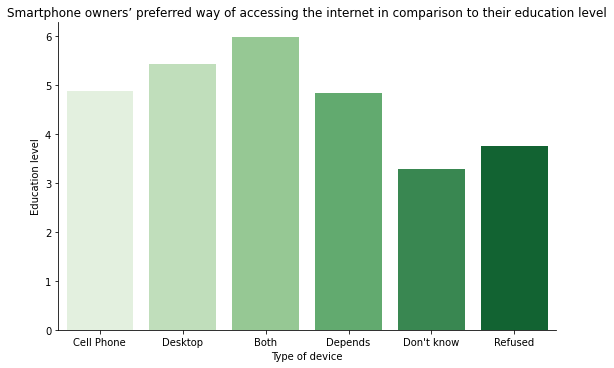

In [19]:
df = pd.read_csv('CoreTrendsSurvey.csv')

devDF = pd.DataFrame(df[['q20', 'educ2']])
pd.melt(devDF, id_vars=['q20'], value_vars=['educ2'])

for column in devDF:
    devDF[column] = devDF[column].replace(r'\s+', np.nan, regex=True)
    devDF[column] = devDF[column].replace('98', np.nan, regex=True)
    devDF[column] = devDF[column].replace('99', np.nan, regex=True)

devDF[["q20"]] = devDF[["q20"]].apply(pd.to_numeric)
devDF[["educ2"]] = devDF[["educ2"]].apply(pd.to_numeric)

ax = sns.catplot(x = 'q20', y = "educ2", data = devDF, kind = "bar", palette='Greens', ci = None)
plt.gcf().set_size_inches(8, 5)

ax.set_xticklabels(['Cell Phone', 'Desktop', 'Both', 'Depends', "Don't know", 'Refused'])

plt.title("Smartphone owners’ preferred way of accessing the internet in comparison to their education level")
ax.set(xlabel='Type of device', ylabel='Education level')

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.4 (15%): How broadband subscription varies by the type of device people use 

The visualization shows that whether a person had or did not have a boardband subscription, the values are the same. Probably, I did something wrong in calculations.

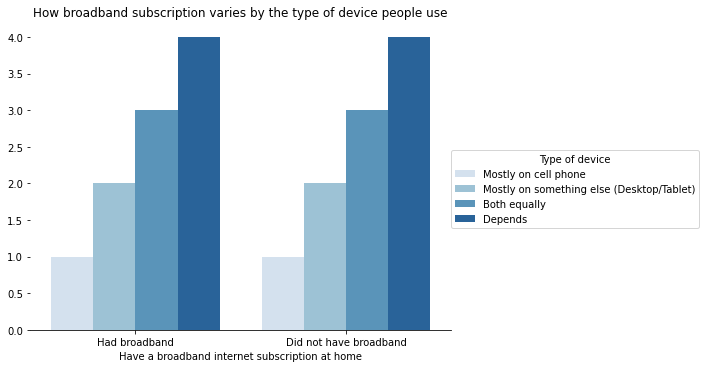

In [20]:
df1 = pd.read_csv('CoreTrendsSurvey.csv')
devDF1 = pd.DataFrame(df1[['bbsmart1', 'q20']])
pd.melt(devDF1, id_vars=['bbsmart1'], value_vars=['q20'])

for column in devDF1:
    devDF1[column] = devDF1[column].replace(r'\s+', np.nan, regex=True)
    devDF1[column] = devDF1[column].replace('98', np.nan, regex=True)
    devDF1[column] = devDF1[column].replace('99', np.nan, regex=True)
    devDF1[column] = devDF1[column].replace('8', np.nan, regex=True)
    devDF1[column] = devDF1[column].replace('9', np.nan, regex=True)

devDF1[["bbsmart1"]] = devDF1[["bbsmart1"]].apply(pd.to_numeric)
devDF1[["q20"]] = devDF1[["q20"]].apply(pd.to_numeric)

ax = sns.catplot(x = 'bbsmart1', y = "q20", hue="q20", data = devDF1, kind = "bar", palette='Blues', ci = None)
plt.gcf().set_size_inches(8, 5)

ax.set_xticklabels(['Had broadband', 'Did not have broadband'])

plt.title("How broadband subscription varies by the type of device people use")
ax.set(xlabel='Have a broadband internet subscription at home', ylabel='')
sns.despine(left=True)
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)

legendObj = ax.legend
handlesObj = legendObj.legendHandles 
texts = legendObj.texts

plt.legend(labels = ['Mostly on cell phone', 
                     'Mostly on something else (Desktop/Tablet)', 
                     'Both equally', 
                     'Depends'],
    title = "Type of device",
    loc = 1,
    bbox_to_anchor=(1.1, 0.1, 0.5, 0.5),
    handles = handlesObj)

legendObj.remove()